# Bad Loan Prediction

##### written by : Chandrima Chkrabarty (chakrabartychandrima91@gmail.com)

### Objective-
1. Find key parameters that impacts the prediction of 'bad loan' at the time of lending

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
pd.set_option('display.max_columns', None)

#### Read The Dataset

In [2]:
df = pd.read_csv('lc_2016_2017.csv') #read data
df.head(2)

C:\Users\IITM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0


In [3]:
df.shape

(759338, 72)

# Feature Selection

We have collected those features which will be available with us when a customer will submit his/her application to the lending club as we want to predict the 'bad loan' before it gets sanctioned. Therefore based on these available features we will be dciding the same. Also we have discarded few more features due to its data redundancy or NAN values.

In [350]:
df_clean = df[['grade','installment','int_rate','annual_inc','issue_d','loan_amnt','purpose','tot_cur_bal','dti','all_util','open_acc_6m','total_acc','home_ownership','pub_rec','sub_grade',
               'loan_status','inq_fi','total_cu_tl']]

#all these features will be available to us with the application of the customer

Now we need to see the overall correlation between all the parameters.

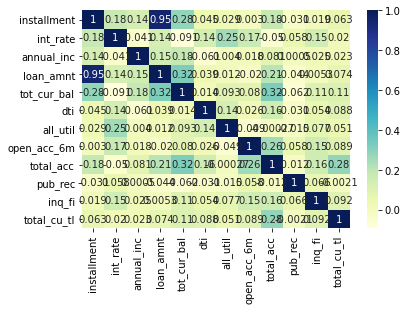

In [351]:
#Plot the correlation betwwen all the available features
import seaborn as sb
dataplot = sb.heatmap(df_clean.corr(), cmap="YlGnBu", annot=True)

In [353]:
df_clean.shape

(759338, 18)

#### A general overview of Data

In [354]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   grade           759338 non-null  object 
 1   installment     759338 non-null  float64
 2   int_rate        759338 non-null  float64
 3   annual_inc      759338 non-null  float64
 4   issue_d         759338 non-null  object 
 5   loan_amnt       759338 non-null  int64  
 6   purpose         759338 non-null  object 
 7   tot_cur_bal     759338 non-null  float64
 8   dti             758983 non-null  float64
 9   all_util        759224 non-null  float64
 10  open_acc_6m     759276 non-null  float64
 11  total_acc       759338 non-null  int64  
 12  home_ownership  759338 non-null  object 
 13  pub_rec         759338 non-null  int64  
 14  sub_grade       759338 non-null  object 
 15  loan_status     759338 non-null  object 
 16  inq_fi          759277 non-null  float64
 17  total_cu_t

Among the 18 Features few are categorical or object

Few are discrete numbers or continous (integer,float)

###### Let's describe the data

This section will provide a overall descriptive statistics of the data. 

It shows mean, standard deviation, minimum value, maximum value etc. of any features.

In [355]:
df_clean.describe()

,installment,int_rate,annual_inc,loan_amnt,tot_cur_bal,dti,all_util,open_acc_6m,total_acc,pub_rec,inq_fi,total_cu_tl
count,759338.000000,759338.000000,7.593380e+05,759338.000000,7.593380e+05,758983.000000,759224.000000,759276.000000,759338.000000,759338.000000,759277.000000,759276.000000
mean,442.584639,13.187041,7.996778e+04,14707.775260,1.447215e+05,18.980803,59.259296,0.954601,24.136807,0.244998,0.968562,1.475229
std,275.739578,5.054311,1.634141e+05,9215.456493,1.624493e+05,13.363398,20.473969,1.151399,11.955676,0.660138,1.484057,2.681394
min,30.120000,5.320000,0.000000e+00,1000.000000,0.000000e+00,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,241.700000,9.750000,4.800000e+04,7500.000000,3.006000e+04,12.260000,46.000000,0.000000,15.000000,0.000000,0.000000,0.000000
50%,370.840000,12.620000,6.700000e+04,12000.000000,8.170450e+04,18.180000,60.000000,1.000000,22.000000,0.000000,0.000000,0.000000
75%,590.505000,15.590000,9.500000e+04,20000.000000,2.156978e+05,24.780000,74.000000,1.000000,31.000000,0.000000,1.000000,2.000000
max,1719.830000,30.990000,1.100000e+08,40000.000000,8.524709e+06,999.000000,211.000000,18.000000,176.000000,61.000000,48.000000,111.000000


### Data Processiong

##### Treating NAN value

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.heatmap(df_clean.isna())

In [356]:
#Removing Columns which contains NaN value more than 10%

nan_col = df_clean.columns[df_clean.isnull().mean() > 0.10]
nan_col

Index([], dtype='object')

As we have already sorted the NAN valued column in our EDA and portfolio prpearation. Therefore here no NAN valued column is observed. We have now organised clean data with us for further analysis.

In [361]:
df_clean['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

Bad Loan = 'Charged Off', 'Default', assigning '0'


Good Loan = 'Fully Paid','In Grace Period', assigning '1'

In [362]:
df_clean = df_clean[df_clean.loan_status.isin(['Fully Paid','In Grace Period','Charged Off', 'Default'])]
df_clean['bad_loan'] = [1 if (i=='Default') | (i =='Charged Off') else 0 for i in df_clean['loan_status']]

#### Label Encoding

Features are consisting differnt categorical values which needs to be converted into numerical values to avoid weightage problem and proceed further.

In [365]:
dff = df_clean.astype(str).apply(LabelEncoder().fit_transform)

#### Splitting the value in X and Y

In [368]:
X = dff.drop(['loan_status','bad_loan'],axis=1)
y = dff['bad_loan']

#### Scaling the features

In the dataset different features are having different range of numbers. Features with higher range may impact the weightage val;ue more than the features with lower range. This lead to misclassification during the model training. Therefore we are bringing all the value between 0-1 with MinMaxScalar technique to avoid any kind of misclassification

In [372]:
scaler = MinMaxScaler()
XX = scaler.fit_transform(X)

#### Encounter class imbalance

In the following line we have seen that the '0' class is in the data for 137352 times whereas the '1' class is for 37233 times. 
Therefore, the class imbalance is clearly shown in the data and eneds to be treated for unbiased result.

In [370]:
y.value_counts()

0    137352
1     37233
Name: bad_loan, dtype: int64

# SMOTE (Synthetic Minority Oversampling Technique)

we are oversampling with the SMOTE technique to create higher number of sample size with the lower sampled class [in this case '1' class]

In [373]:
from imblearn.over_sampling import SMOTE

over  = SMOTE(sampling_strategy=0.60)
X_sm, y_sm = over.fit_resample(XX, y)

In [376]:
pd.DataFrame(y_sm).value_counts() #now class '1' is having good amount of sample size

0    137352
1     82411
Name: bad_loan, dtype: int64

# Model Run

In [374]:
#25% of the total data is taken as testing data and 75% is taken as training data

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.25, random_state=20) 

In [375]:
#array to dataframe conversion

X_sm_ = pd.DataFrame(X_train)
y_sm_ = pd.DataFrame(y_train)

#### Cross Validation technique (4 fold)

In [377]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=4):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [378]:
weights = class_weight.compute_class_weight('balanced',np.unique(y_sm_['bad_loan']),y_sm_['bad_loan'])
print('Using class weights while training')
list(weights)

Using class weights while training


C:\Users\IITM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1], y=61968     0
98539     1
165629    0
63885     1
37999     0
         ..
178569    1
31962     0
23775     0
37135     0
92634     0
Name: bad_loan, Length: 164822, dtype: int32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[0.8020457221827525, 1.327689259074286]

#### Model Construction

CatBoost model is used in our study.

In [379]:
#hyperparameters of model

cat_params= {'n_estimators': 20000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133,
                    'random_seed':42,
                    'class_weights':list(weights)
            }

In [380]:
from catboost import CatBoostClassifier

cat_model = cross_val(X_sm_, y_sm_, CatBoostClassifier, cat_params)

Fold: 0
0:	learn: 0.6889134	test: 0.6888584	best: 0.6888584 (0)	total: 48.6ms	remaining: 16m 12s
400:	learn: 0.4427689	test: 0.4428610	best: 0.4428610 (400)	total: 11.8s	remaining: 9m 35s
800:	learn: 0.4194224	test: 0.4211096	best: 0.4211096 (800)	total: 25.2s	remaining: 10m 3s
1200:	learn: 0.4103785	test: 0.4138375	best: 0.4138375 (1200)	total: 37s	remaining: 9m 39s
1600:	learn: 0.4051765	test: 0.4105565	best: 0.4105565 (1600)	total: 49.4s	remaining: 9m 27s
2000:	learn: 0.4014168	test: 0.4088215	best: 0.4088201 (1998)	total: 1m 1s	remaining: 9m 15s
2400:	learn: 0.3983056	test: 0.4077438	best: 0.4077393 (2365)	total: 1m 13s	remaining: 9m 2s
2800:	learn: 0.3955981	test: 0.4070442	best: 0.4070414 (2797)	total: 1m 26s	remaining: 8m 48s
3200:	learn: 0.3929707	test: 0.4064334	best: 0.4064312 (3194)	total: 1m 38s	remaining: 8m 37s
3600:	learn: 0.3906533	test: 0.4059976	best: 0.4059960 (3596)	total: 1m 50s	remaining: 8m 24s
4000:	learn: 0.3884071	test: 0.4055974	best: 0.4055902 (3978)	total: 

# Model Evaluation

In [381]:
print('Train AUC :',roc_auc_score(y_train, cat_model.predict_proba(X_train)[:, 1]))
print('Test AUC :',roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1]))

Train AUC : 0.8920768591461565
Test AUC : 0.87848392165134


#### Feature importance

Most important Features are :


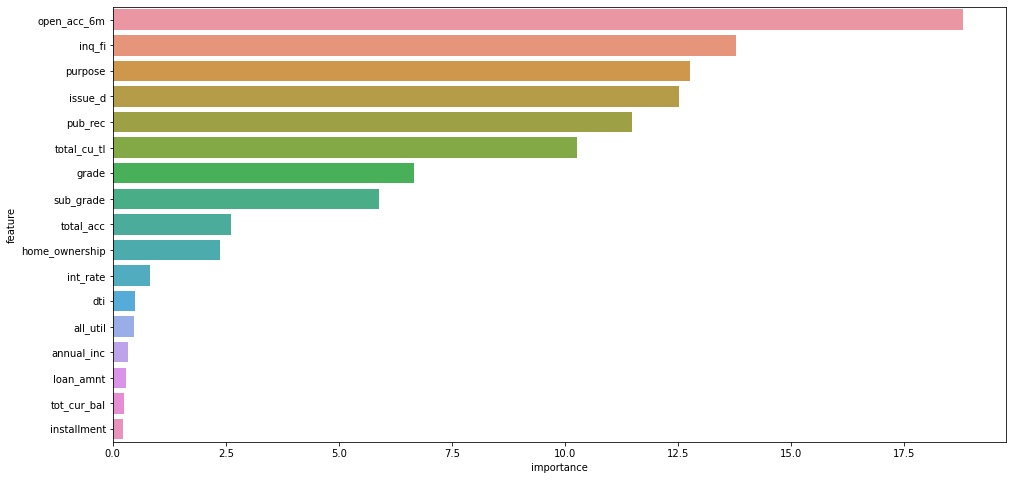

In [431]:
plt.figure(figsize=[16,8])
feat_imp=[t for t in zip(X.columns,cat_model.feature_importances_)]
feat_imp_df=pd.DataFrame(feat_imp,columns=['feature','importance'])
feat_imp_df=feat_imp_df.sort_values('importance',ascending=False)
print('Most important Features are :')
#feat_imp_df=feat_imp_df[feat_imp_df['importance']>=1]
sns.barplot(x='importance',y='feature',data=feat_imp_df)
#plt.show()
plt.savefig('feature.png')

In [383]:
cat_model.score(X_test,y_test)

0.8232103529240458

In [384]:
y_predicted = cat_model.predict(X_test)

#### Confusion Matrix

In [385]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix



cm = confusion_matrix(y_test, y_predicted) #check confusion matrix to find the model accuracy
cm 

array([[31184,  3417],
       [ 6296, 14044]], dtype=int64)

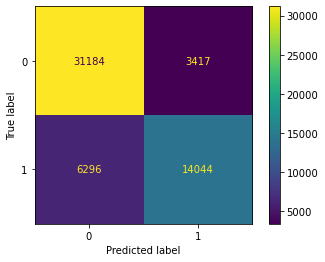

In [429]:
plot_confusion_matrix(cat_model,X_test,y_test)
plt.savefig('confusionmatrix_catboost.png')

#### Prediction Probability

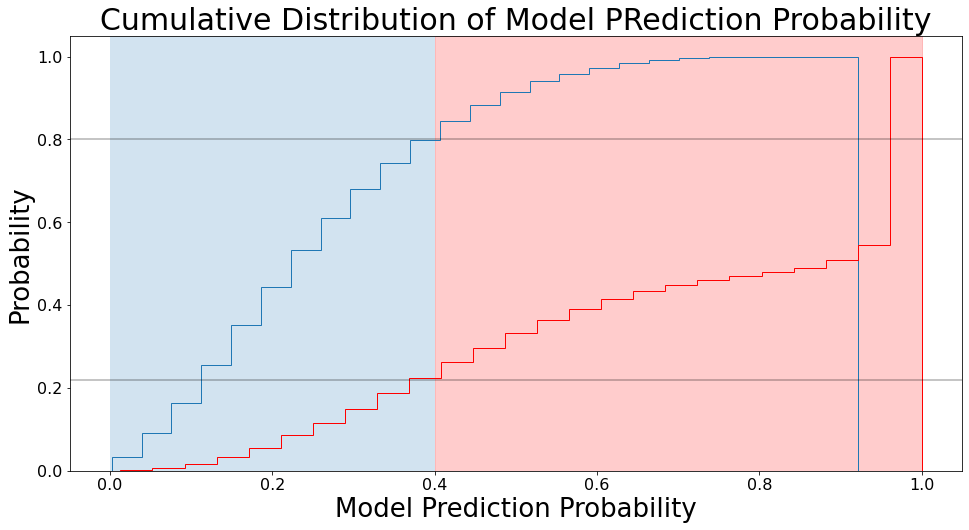

In [434]:
pred_catb = cat_model.predict_proba(X_test)[:,1]

fff = pd.DataFrame(y_test).reset_index()
fff = fff.iloc[:,1:]

idx = fff[fff==0].dropna()

ee = pd.DataFrame(pred_catb)

plt.figure(figsize=[16,8])
weights = np.ones_like(ee.loc[idx.index])/float(len(ee.loc[idx.index]))
cc = plt.hist(ee.loc[idx.index],weights=weights,bins = 25,histtype='step',cumulative=True)


idx_ = fff[fff==1].dropna()


weights = np.ones_like(ee.loc[idx_.index])/float(len(ee.loc[idx_.index]))
cc = plt.hist(ee.loc[idx_.index],weights=weights,bins = 25,histtype='step',color='r',cumulative=True)

plt.axvspan(0,0.4,alpha=0.2)
plt.axvspan(0.4,1,color='r',alpha=0.2)
plt.axhline(0.22,color='k',alpha=0.3)
plt.axhline(0.8,color='k',alpha=0.3)

plt.tick_params(labelsize=16)
plt.ylabel('Probability',fontsize=26)
plt.xlabel('Model Prediction Probability',fontsize=26)
plt.title('Cumulative Distribution of Model PRediction Probability',fontsize = 30)
plt.savefig('conclusion.png')

# Conclusion

The above graph describes that if we provide the above mentioned features to the model and the probability of getting 1 is less than 0.4, then there is a 80 % chance for the model to predict the good loan.

On the other hand, if the probability of getting 1 is more than 0.4, there is a 80 % chance to get bad_loan status.